# Machine Learning

In order to carry out the ML process, the datasets further need to be wrangled and merged to prepare the final features dataset.

In [1]:
# Import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
# Read the previous csv files as dataframes: titles_crew_pre

titles_crew=pd.read_csv('titles_crew_new.csv').drop(['Unnamed: 0'],axis=1)
titles=pd.read_csv('titles_new.csv').drop(['Unnamed: 0'],axis=1)
titles_corr = pd.read_csv('titles_corr.csv').drop(['Unnamed: 0'],axis=1)
ratingMean = pd.read_csv('ratingMean.csv').drop(['Unnamed: 0'],axis=1)
ratingMax = pd.read_csv('ratingMax.csv').drop(['Unnamed: 0'],axis=1)

As part of the in-depth analysis, we need to wrangle some of the datasets again to prepare them for analysis.

In [3]:
# Replace NaN values with 0
titles_corr.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 35 columns):
tconst                   8540 non-null object
averageRating            8540 non-null float64
runtimeMinutes           8540 non-null float64
numVotes                 8540 non-null int64
genre_Thriller           8540 non-null bool
genre_Comedy             8540 non-null bool
genre_Sport              8540 non-null bool
genre_Sci-Fi             8540 non-null bool
genre_Action             8540 non-null bool
genre_Horror             8540 non-null bool
genre_Crime              8540 non-null bool
genre_Biography          8540 non-null bool
genre_War                8540 non-null bool
genre_Animation          8540 non-null bool
genre_Mystery            8540 non-null bool
genre_Music              8540 non-null bool
genre_Fantasy            8540 non-null bool
genre_Adventure          8540 non-null bool
genre_History            8540 non-null bool
genre_Romance            8540 non-null bool
genr

### Merge all datasets

In [4]:
# Add the suffix '_rating' to the columns of ratingMean to distinctly identify them before merging with the main dataset

ratingMean = ratingMean.add_suffix('_rating')

ratingMean.rename(columns={'tconst_rating':"tconst", "averageRating_rating": "averageRating"},inplace=True)
ratingMean.columns

Index(['tconst', 'averageRating', 'actor_rating', 'actress_rating',
       'cinematographer_rating', 'composer_rating', 'director_rating',
       'editor_rating', 'producer_rating', 'self_rating', 'writer_rating',
       'cast_rating', 'crew_rating'],
      dtype='object')

In [6]:
# Merge the datasets titles_corr and ratingMean: df
df = pd.merge(titles_corr,ratingMean.drop(labels='averageRating',axis=1),on='tconst',how='left')

In [7]:
df.head()

,tconst,averageRating,runtimeMinutes,numVotes,genre_Thriller,genre_Comedy,genre_Sport,genre_Sci-Fi,genre_Action,genre_Horror,...,actress_rating,cinematographer_rating,composer_rating,director_rating,editor_rating,producer_rating,self_rating,writer_rating,cast_rating,crew_rating
0,tt0035423,6.4,118.0,73337,False,True,False,False,False,False,...,5.7,6.2,6.4,7.2,6.7,6.900000,NaN,6.7,6.0,6.7
1,tt0111068,7.1,127.0,4740,True,False,False,False,True,False,...,6.5,NaN,7.4,7.0,NaN,5.800000,NaN,6.1,6.5,6.6
2,tt0168501,6.7,120.0,8317,False,True,False,False,False,False,...,5.7,6.6,6.1,5.9,NaN,6.433333,NaN,NaN,5.8,6.3
3,tt0168504,5.7,101.0,1450,False,True,False,False,True,False,...,NaN,6.5,NaN,NaN,NaN,5.800000,NaN,NaN,5.4,6.2
4,tt0168786,7.3,120.0,30259,False,False,False,False,False,False,...,6.2,6.7,6.7,NaN,5.9,6.600000,NaN,6.7,6.4,6.5


There might be some cast/crew that affects the ratings of the movies. It is not possible to incorporate all the crew members as features as their are around 83000 unique cast/crew. 

In order to incorporate the cast/crew, we are considering the 10 most frequent cast/crew each in the top-rated (rating 8 and above) and bottom-rated (rating 4 and below) movies.

In [8]:
titles.columns

Index(['tconst', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes', 'roundRating', 'genre_Thriller', 'genre_Comedy',
       'genre_Sport', 'genre_Sci-Fi', 'genre_Action', 'genre_Horror',
       'genre_Crime', 'genre_Biography', 'genre_War', 'genre_Animation',
       'genre_Mystery', 'genre_Music', 'genre_Fantasy', 'genre_Adventure',
       'genre_History', 'genre_Romance', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'actor', 'actress', 'cinematographer', 'composer',
       'director', 'editor', 'producer', 'self', 'writer', 'count_actor',
       'count_actress', 'count_cinematographer', 'count_composer',
       'count_director', 'count_editor', 'count_producer', 'count_writer',
       'count_self', 'cast_total', 'crew_total', 'actor_ratio'],
      dtype='object')

In [9]:
t1 = titles_crew.nlargest(4500,'averageRating').nconst.value_counts().reset_index()
t2 = titles_crew.nsmallest(4500,'averageRating').nconst.value_counts().reset_index()

titles['crew'] = titles.actor.str.cat(titles.actress,sep=",",na_rep='').str.cat(titles.cinematographer,sep=",",na_rep='').str.cat(titles.composer,sep=",",na_rep='').str.cat(titles.director,sep=",",na_rep='').str.cat(titles.editor,sep=",",na_rep='').str.cat(titles.producer,sep=",",na_rep='').str.cat(titles.self,sep=",",na_rep='').str.cat(titles.writer,sep=",",na_rep='')
titles.iloc[:,26:].head()

,actor,actress,cinematographer,composer,director,editor,producer,self,writer,count_actor,...,count_composer,count_director,count_editor,count_producer,count_writer,count_self,cast_total,crew_total,actor_ratio,crew
0,"nm0413168,nm0000630,nm0005227",nm0000212,nm0238698,nm0448843,nm0003506,nm0107463,nm0465298,NaN,nm0737216,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,4.0,6.0,3.0,"nm0413168,nm0000630,nm0005227,nm0000212,nm0238..."
1,"nm0474774,nm0709359,nm0694986",nm0006689,NaN,nm1269729,nm0151511,NaN,nm0080319,NaN,"nm0080315,nm0223475,nm0365383",3.0,...,1.0,1.0,0.0,1.0,3.0,0.0,4.0,6.0,3.0,"nm0474774,nm0709359,nm0694986,nm0006689,,nm126..."
2,"nm0004875,nm0004820,nm0674782",nm0000505,nm0697910,nm0006010,nm0002700,NaN,"nm0140011,nm0457757,nm0000490",NaN,NaN,3.0,...,1.0,1.0,0.0,3.0,0.0,0.0,4.0,6.0,3.0,"nm0004875,nm0004820,nm0674782,nm0000505,nm0697..."
3,"nm0007045,nm0174780,nm0034492,nm0354469",NaN,nm0003394,nm0443867,NaN,nm0867498,"nm0298181,nm0336925,nm0852423",NaN,NaN,4.0,...,1.0,0.0,1.0,3.0,0.0,0.0,4.0,6.0,0.0,"nm0007045,nm0174780,nm0034492,nm0354469,,nm000..."
4,"nm0000243,nm1035682,nm1287636",nm0117146,nm0003542,nm0002217,NaN,nm0119322,"nm0085542,nm0354279",NaN,nm0279376,3.0,...,1.0,0.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,"nm0000243,nm1035682,nm1287636,nm0117146,nm0003..."


In [10]:
for i in t1[:10]['index']:
        titles[i] = titles.crew.str.contains(i)
        
for i in t2[:10]['index']:
        titles[i] = titles.crew.str.contains(i)

In [11]:
titles.iloc[:,47:].head()

,crew,nm0000138,nm0598531,nm0634240,nm0000354,nm0000093,nm0000288,nm0424060,nm0451148,nm0858799,...,nm0490375,nm0725808,nm0727235,nm0000219,nm0833173,nm0561053,nm0294997,nm1149785,nm1700105,nm0783536
0,"nm0413168,nm0000630,nm0005227,nm0000212,nm0238...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"nm0474774,nm0709359,nm0694986,nm0006689,,nm126...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"nm0004875,nm0004820,nm0674782,nm0000505,nm0697...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,"nm0007045,nm0174780,nm0034492,nm0354469,,nm000...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"nm0000243,nm1035682,nm1287636,nm0117146,nm0003...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
titles.columns


Index(['tconst', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes', 'roundRating', 'genre_Thriller', 'genre_Comedy',
       'genre_Sport', 'genre_Sci-Fi', 'genre_Action', 'genre_Horror',
       'genre_Crime', 'genre_Biography', 'genre_War', 'genre_Animation',
       'genre_Mystery', 'genre_Music', 'genre_Fantasy', 'genre_Adventure',
       'genre_History', 'genre_Romance', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'actor', 'actress', 'cinematographer', 'composer',
       'director', 'editor', 'producer', 'self', 'writer', 'count_actor',
       'count_actress', 'count_cinematographer', 'count_composer',
       'count_director', 'count_editor', 'count_producer', 'count_writer',
       'count_self', 'cast_total', 'crew_total', 'actor_ratio', 'crew',
       'nm0000138', 'nm0598531', 'nm0634240', 'nm0000354', 'nm0000093',
       'nm0000288', 'nm0424060', 'nm0451148', 'nm0858799', 'nm0353673',
       'nm0490375', 'nm0725808', 'nm0727235', 'nm0000219

In [13]:
df.columns

Index(['tconst', 'averageRating', 'runtimeMinutes', 'numVotes',
       'genre_Thriller', 'genre_Comedy', 'genre_Sport', 'genre_Sci-Fi',
       'genre_Action', 'genre_Horror', 'genre_Crime', 'genre_Biography',
       'genre_War', 'genre_Animation', 'genre_Mystery', 'genre_Music',
       'genre_Fantasy', 'genre_Adventure', 'genre_History', 'genre_Romance',
       'genre_Drama', 'genre_Documentary', 'genre_Family', 'count_actor',
       'count_actress', 'count_cinematographer', 'count_composer',
       'count_director', 'count_editor', 'count_producer', 'count_writer',
       'count_self', 'cast_total', 'crew_total', 'actor_ratio', 'actor_rating',
       'actress_rating', 'cinematographer_rating', 'composer_rating',
       'director_rating', 'editor_rating', 'producer_rating', 'self_rating',
       'writer_rating', 'cast_rating', 'crew_rating'],
      dtype='object')

In [14]:
titles.shape

(8540, 68)

In [15]:
df.shape

(8540, 46)

In [16]:
# Add the best and worst movies's frequently occuring crew columns to the main dataset df

df = pd.merge(df,titles.drop(titles.loc[:,'startYear':'crew'],axis=1),on='tconst',how='left')

In [17]:
df.head()

,tconst,averageRating,runtimeMinutes,numVotes,genre_Thriller,genre_Comedy,genre_Sport,genre_Sci-Fi,genre_Action,genre_Horror,...,nm0490375,nm0725808,nm0727235,nm0000219,nm0833173,nm0561053,nm0294997,nm1149785,nm1700105,nm0783536
0,tt0035423,6.4,118.0,73337,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0111068,7.1,127.0,4740,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0168501,6.7,120.0,8317,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0168504,5.7,101.0,1450,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0168786,7.3,120.0,30259,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Check if scaling is needed

df.describe()

,averageRating,runtimeMinutes,numVotes,count_actor,count_actress,count_cinematographer,count_composer,count_director,count_editor,count_producer,...,actress_rating,cinematographer_rating,composer_rating,director_rating,editor_rating,producer_rating,self_rating,writer_rating,cast_rating,crew_rating
count,8540.000000,8536.000000,8.540000e+03,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,8540.000000,...,5443.000000,2537.000000,3783.000000,5617.000000,1175.000000,5974.000000,280.000000,3759.000000,7505.000000,8005.000000
mean,6.113642,102.117854,4.622830e+04,2.325878,1.407026,0.475176,0.708080,1.045316,0.287939,1.860422,...,6.040944,6.163139,6.116059,6.160144,6.278695,6.118817,6.792232,6.118384,6.081119,6.125934
std,1.186594,18.308351,1.102441e+05,1.077079,0.945845,0.552834,0.637219,0.466900,0.508616,1.202021,...,0.683239,0.884923,0.798729,0.907829,0.930820,0.776016,0.820013,0.864040,0.702474,0.795254
min,1.300000,40.000000,1.001000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.800000,2.600000,2.400000,1.800000,2.400000,2.000000,3.100000,2.000000,1.800000,1.800000
25%,5.400000,90.000000,2.177000e+03,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,5.700000,5.700000,5.700000,5.600000,5.800000,5.700000,6.300000,5.600000,5.700000,5.700000
50%,6.200000,98.000000,6.564500e+03,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,6.100000,6.300000,6.200000,6.300000,6.400000,6.200000,6.900000,6.200000,6.200000,6.200000
75%,7.000000,110.000000,3.600925e+04,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,6.500000,6.800000,6.700000,6.800000,7.000000,6.600000,7.400000,6.700000,6.500000,6.600000
max,9.300000,239.000000,2.019477e+06,8.000000,6.000000,4.000000,6.000000,6.000000,3.000000,6.000000,...,8.200000,8.200000,8.000000,8.600000,8.400000,8.400000,8.100000,8.600000,8.100000,8.200000


We do not need to scale as there is not much variance in any of the features

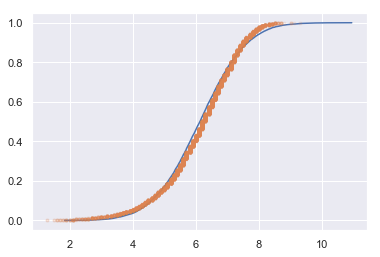

In [19]:
# Check the movie ratings for normality

mean=df.averageRating.mean()
std=df.averageRating.std()
samples=np.random.normal(mean,std,10000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x,y = ecdf(df.averageRating)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor,y_theor)

_ = plt.plot(x,y,marker='.',linestyle='none',alpha=.1)


The ratings appear to be normal

#### Now our final dataset is ready to carry out machine learning operations.

## Machine Learning Process and Methodology

To find the best model for our purpose, we will train our data on different algorithms, compare their performance based on the Root mean square error of the prediction and time taken to fit/predict the model, and select the best. 

### Algorithms employed:
1. Linear Regression
2. Regularization Model - Ridge
3. Regularization Model - Lasso
4. Ensemble Model - Random Forest
1. Ensemble Model - Gradient Boost
1. Ensemble Model - Ada Boost

After training and evaluating our data on the above algorithms, we will also use model stacking.

7. Stack - Linear Regression
8. Stack - Random Forest
9. Stack - Gradient Boost

In [22]:
from sklearn.model_selection import train_test_split

# Define the feature and target variables

X = df.fillna(0).drop(labels=['tconst','averageRating','numVotes'],axis=1)*1
y = df.averageRating

# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state = 42)


In [24]:
# Data Frame to store all the RMSE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSE'] = None
algo_score['Test RMSE'] = None
# algo_score['Validation RMSE'] = None
algo_score['Hyperparameters'] = None
algo_score['Training+Test Time(sec)'] = None

cv_time = []

# Dataframes for second level of predictions. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X_train.index)
ypred_test = pd.DataFrame(index = X_test.index)

ypred_train['actualRating'], ypred_test['actualRating'] = y_train, y_test


We will define functions to measure the model, apply cross validation, and predict on train and test datasets. We have not included model fitting in the functions as that will happen as part of hyperparameter tuning

In [25]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Error)
def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

plot_true_vs_pred: This is used to plot True and Predicted count values for a particular time interval



In [26]:
# Plots True vs. Predicted count values
def plot_true_vs_pred (y_actual, y_pred):
    fig = plt.figure(figsize=(18, 16))
    
    pred_val = pd.DataFrame({'actual':y_actual,'predicted':y_pred})
    pred_val['error']=abs(pred_val.actual-pred_val.predicted)
    sns.swarmplot(pred_val.actual.round(0),pred_val.error)
    
    plt.show()

In [28]:
# Function to predict on train and test data and return the required metrics
def model_fit(model, X_train, y_train, X_test, y_test):
    ''' 
    Input:
        model = model to be applied
        X_train y_train = Training data
        X_test, y_test = Testing data
    Output:
        rmse for training and test data 
        predicted y for training and test data
    
    '''
#     model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    
    rmse_all = [rmse_train, rmse_test]
    y_pred_all = [y_train_predict, y_test_predict]
    
    return(rmse_all, y_pred_all)

In [29]:
from sklearn.model_selection import cross_val_predict
def cross_val(model, X_train, y_train, cv=5):
#     y_pred = pd.Series(index=y_train.index)
    y_pred = cross_val_predict(model,X_train,y_train,cv=5)

    rmse_train = rmse(y_train,y_pred)
    return(rmse_train, y_pred)


## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

param_summary = ['','']

%time reg.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(reg, X_train, y_train, X_test, y_test)

ypred_test['LR'] = y_predict_summary[1]  
ypred_train['LR'] = y_predict_summary[0]

algo_score.loc['Linear Regression'] = rmse_summary+param_summary

Wall time: 135 ms
Wall time: 78.9 ms


In [31]:
algo_score.loc['Linear Regression', 'Training+Test Time(sec)'] = 0.214
cv_time.append(0.214)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.88972,0.903349,,0.214


#### Observations

Not an overfit model - both train and test RMSE are more or less similar

In [32]:
# Features and the Estimated Linear Regression Coefficients
df_coeff = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': reg.coef_})

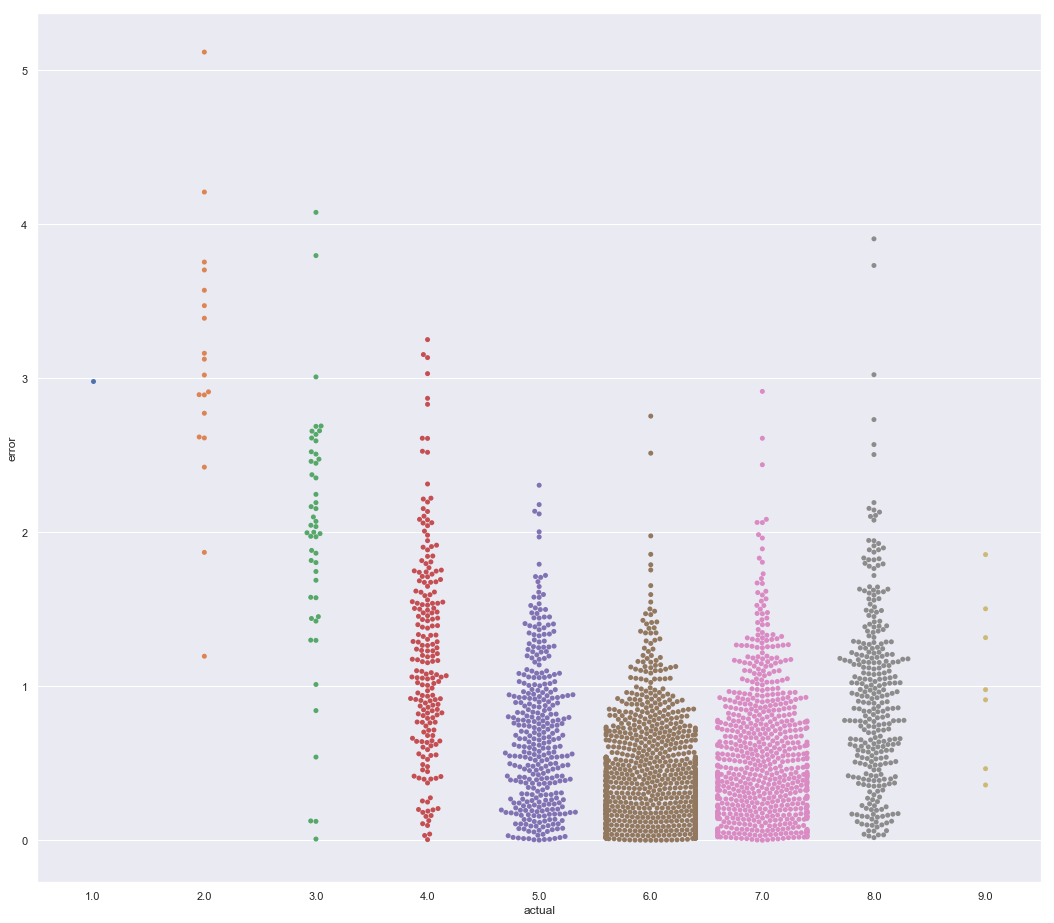

In [33]:
# Linear Regression Plot: True vs. Predicted
plot_true_vs_pred(y_test,y_predict_summary[1])

### Regularization Model - Ridge


In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

Wall time: 5.34 s
Best alpha for Ridge Regression Model: {'alpha': 2}


In [35]:
# Fine tune Hyperparameter for edge cases
param_grid = {'alpha': np.arange(1,3,.25)}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

Wall time: 5.31 s
Best alpha for Ridge Regression Model: {'alpha': 2.75}


In [36]:
param_summary = [ridge.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ridge, X_train, y_train, X_test, y_test)

ypred_test['Ridge'] = y_predict_summary[1]  
ypred_train['Ridge'] = y_predict_summary[0]

algo_score.loc['Ridge Regression'] = rmse_summary+param_summary

Wall time: 104 ms


In [37]:
algo_score.loc['Ridge Regression', 'Training+Test Time(sec)'] = 5.414
cv_time.append(5.414)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414


#### Observations

Ridge gives almost similar performance as Linear Regression. It is not an overfit model

In [38]:
# Features and the Estimated Ridge Regression Coefficients
df_coeff['Ridge_Coeff'] = ridge.best_estimator_.coef_


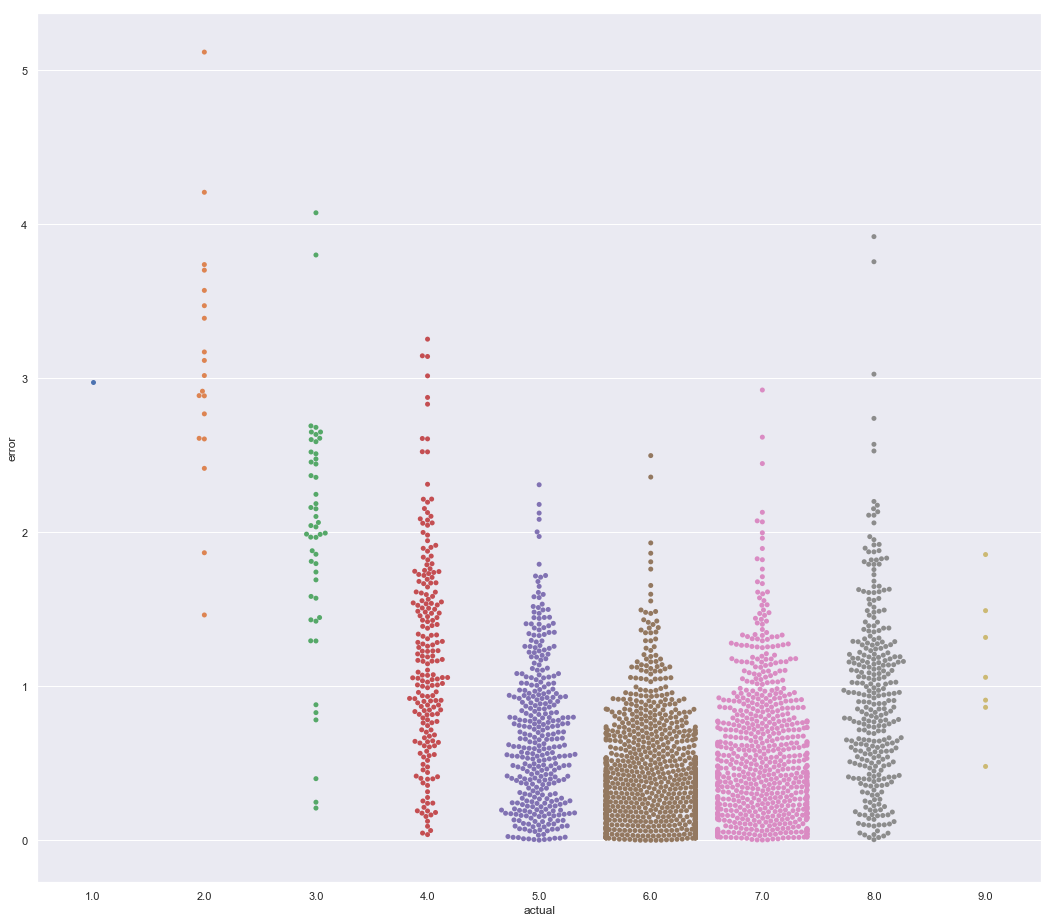

In [39]:
plot_true_vs_pred(y_test,y_predict_summary[1])


### Regularization Model - Lasso

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

Wall time: 8.58 s
Best alpha for Lasso Regression Model: {'alpha': 0.1}


In [41]:
# Fine tune Hyperparameter for edge case

param_grid = {'alpha': np.arange(.01,.2,.01)}#[.025,0.05, 0.1, 0.15]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

Wall time: 59.9 s
Best alpha for Lasso Regression Model: {'alpha': 0.01}


In [42]:
param_summary = [lasso.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(lasso, X_train, y_train, X_test, y_test)
ypred_test['Lasso'] = y_predict_summary[1]
ypred_train['Lasso'] = y_predict_summary[0]

algo_score.loc['Lasso Regression'] = rmse_summary+param_summary

Wall time: 67.9 ms


In [43]:
algo_score.loc['Lasso Regression', 'Training+Test Time(sec)'] = 59.968
cv_time.append(59.968)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968


#### Observations

Lasso regression is showing a poorer performance than Linear and Ridge regression, both in terms of RMSE and time

In [44]:
# Features and the Estimated Lasso Regression Coefficients
df_coeff['Lasso_Coeff'] = lasso.best_estimator_.coef_


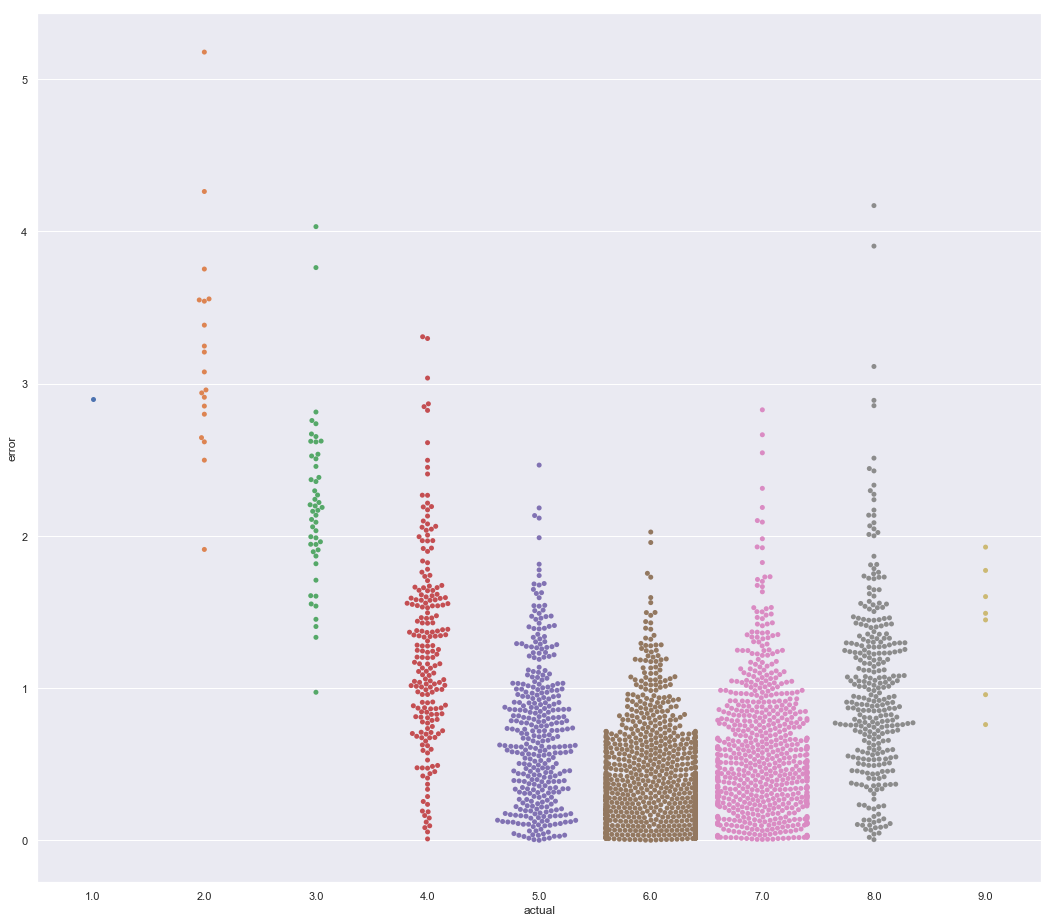

In [45]:
plot_true_vs_pred(y_test,y_predict_summary[1])


### Plotting the coefficients obtained from Linear, Ridge and Lasso regression

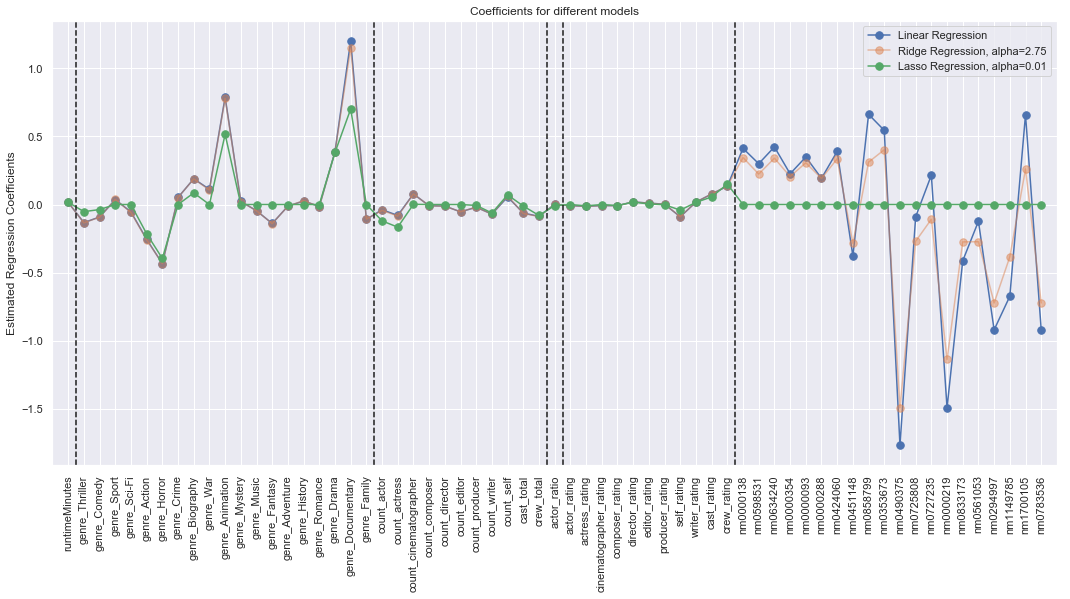

In [46]:
fig = plt.figure(figsize=(18, 18))

axes = fig.add_subplot(2, 1, 1)
axes.plot(df_coeff.Lin_Coeff, label='Linear Regression', marker='.', markersize=15)
axes.plot(df_coeff.Ridge_Coeff, label='Ridge Regression, alpha={}'.format(ridge.best_params_['alpha']), alpha=.5,marker='.', markersize=15)
axes.plot(df_coeff.Lasso_Coeff, label='Lasso Regression, alpha={}'.format(lasso.best_params_['alpha']), marker='.', markersize=15)
axes.axvline(1-0.5, c='k', ls='--')
axes.axvline(20-0.5,  c='k', ls='--')
axes.axvline(31-0.5,  c='k', ls='--')
axes.axvline(32-0.5,  c='k', ls='--')
axes.axvline(43-0.5,  c='k', ls='--')
plt.xticks(range(len(df_coeff.Lin_Coeff)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for different models')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff)])
axes.legend()


#### Observations

1. As expected from the minimizing function, Linear Regression coefficients are most agressive (highest magnitude). Ridge Regression coefficients closely follow Linear Regression. Lasso more or less nullifies most of the coefficients.
1. From the Linear and Ridge coefficient plots, we can see that movie ratings have:
    1. maximum dependency on genre and presence/absence of top 10 cast/crew (highest coefficient magnitudes).
    2. Least dependency on count and rating of the cast/crew

It is interesting to note that most of the top 10 cast/crew have positive coefficients and the the bottom 10 have negative coefficients.

### Ensemble Model - Random Forest


In [47]:
# Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

# param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10],'bootstrap': [True,False]}
# rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
# rf_main.fit(X_train, y_train)

# Following code uses the best parameters generated above to fit the model

param_distributions = {'n_estimators': [5000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[50], 'min_samples_split':[10],'bootstrap': [False]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time rf_main.fit(X_train, y_train)



C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.8min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s



[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.6min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.6min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 1.7min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.8min finished


Wall time: 10min 24s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [5000], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'max_depth': [50], 'min_samples_split': [10], 'bootstrap': [False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}

In [49]:
param_summary = [rf_main.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_main, X_train, y_train, X_test, y_test)
ypred_test['RF'] = y_predict_summary[1]
ypred_train['RF'] = y_predict_summary[0]

algo_score.loc['Random Forest'] = rmse_summary+param_summary


Wall time: 38.8 s


In [50]:
algo_score.loc['Random Forest', 'Training+Test Time(sec)'] = 662.80
cv_time.append(662.80)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8


### Visualize the mean score against different values for n estimators

Parts of code have been commenting out as they take long time to execute

In [115]:
# Testing for edge case

# param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[50], 'min_samples_split':[10],'bootstrap': [False]}
# test_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
# test_rf.fit(X_train, y_train)


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.9s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=100, min

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 19.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 250, 500, 1000, 2000, 5000], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'max_depth': [50], 'min_samples_split': [10], 'bootstrap': [False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

In [153]:
# print('Best parameters for Random Forest Regression Model: {}'.format(test_rf.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [54]:
# rf_result=pd.DataFrame(test_rf.cv_results_)
# rf_result

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,57.231416,4.261187,1.715265,0.176858,5000,10,1,sqrt,50,False,...,-0.638095,0.022338,1,-0.302728,-0.300421,-0.306166,-0.301182,-0.29749,-0.301598,0.002849


In [122]:
# est_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
# est_score

param_n_estimators
50     -0.643577
100    -0.640763
250    -0.639419
500    -0.638958
1000   -0.639069
2000   -0.638354
5000   -0.638130
Name: mean_test_score, dtype: float64

[Text(0,0.5,'Mean CV Test Score'),
 Text(0.5,0,'n_estimators'),
 Text(0.5,1,'n_estimators vs. Score (best_n_estimator = 500)')]

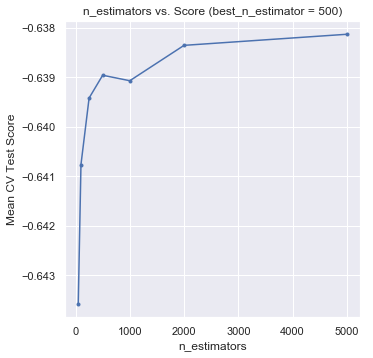

In [123]:
# fig=plt.figure(figsize=(18, 12))

# axes=fig.add_subplot(2, 3, 1)
# axes.plot(est_score.index, est_score.values, marker='.')
# axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 5000)')


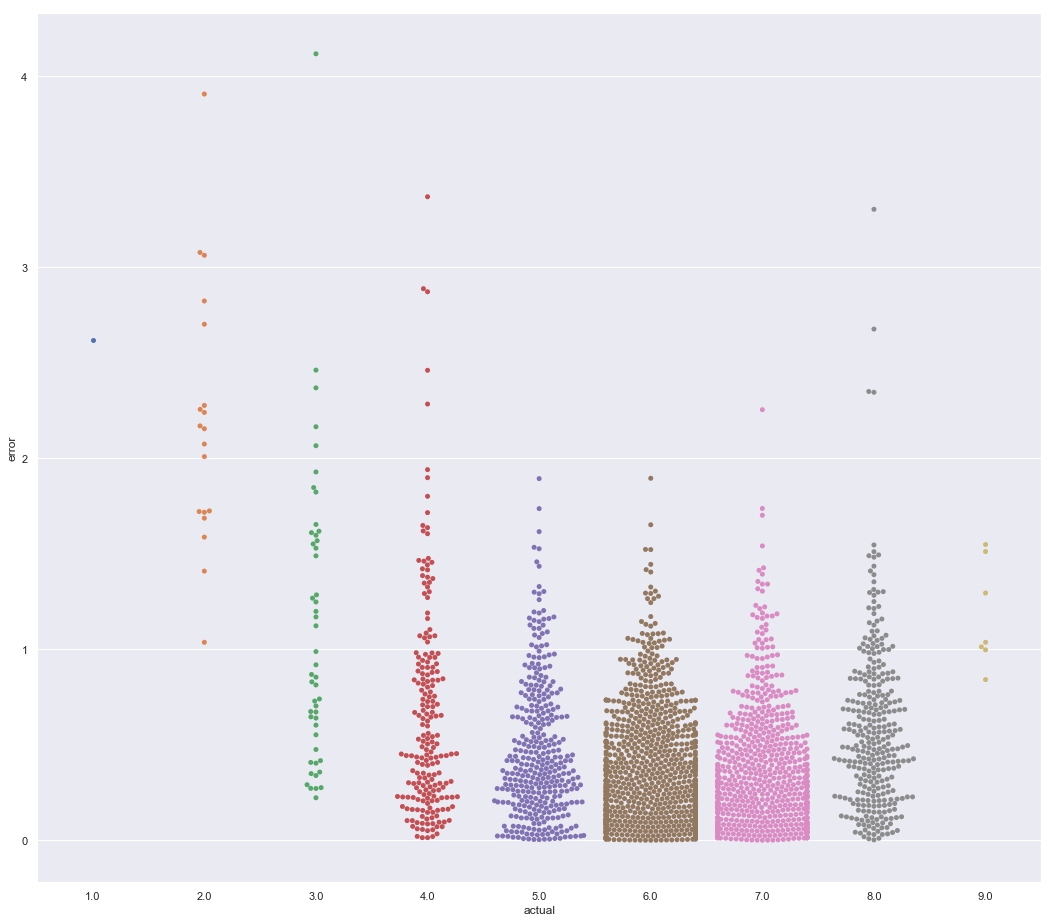

In [51]:
plot_true_vs_pred(y_test,y_predict_summary[1])


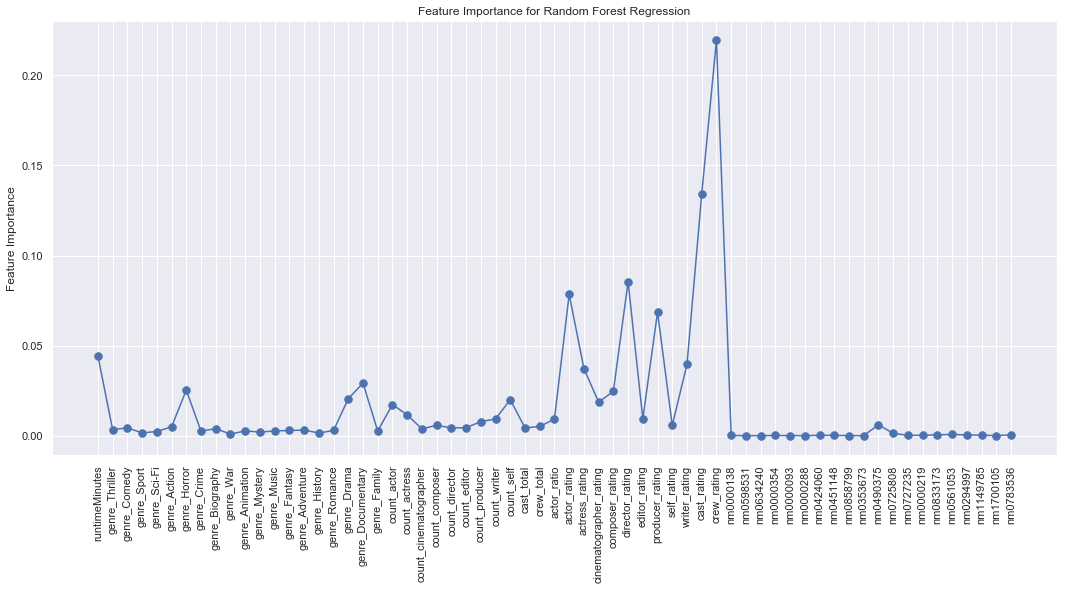

In [52]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')

plt.show()


### Ensemble Method - Gradient Boost

In [58]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

# param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'learning_rate':[0.01, 0.02, 0.05, 0.1],'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10]}
# grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
# grad_boost.fit(X_train, y_train)


In [67]:
# print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}


Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}

In [53]:
# Following code uses the best parameters generated above to fit the model

from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['sqrt'], 'min_samples_leaf':[10], 'max_depth':[60], 'min_samples_split':[2]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
%time grad_boost.fit(X_train, y_train)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Wall time: 1min 29s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [500], 'learning_rate': [0.01], 'max_features': ['sqrt'], 'min_samples_leaf': [10], 'max_depth': [60], 'min_samples_split': [2]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

In [54]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}


In [55]:
param_summary = [grad_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(grad_boost, X_train, y_train, X_test, y_test)
ypred_test['GB'] = y_predict_summary[1]
ypred_train['GB'] = y_predict_summary[0]

algo_score.loc['Gradient Boost'] = rmse_summary+param_summary

Wall time: 796 ms


In [56]:
algo_score.loc['Gradient Boost', 'Training+Test Time(sec)'] = 89.796
cv_time.append(89.796)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8
Gradient Boost,0.324200,0.624689,"{'n_estimators': 500, 'min_samples_split': 2, ...",89.796


### Visualize the mean score against different values for n estimators

Parts of code have been commenting out as they take long time to execute

In [57]:
# gb_result=pd.DataFrame(grad_boost.cv_results_)
# gb_result

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,510.893427,67.511128,9.985637,3.343835,5000,5,7,log2,40,0.01,...,-0.647027,0.020475,17,-0.013342,-0.013798,-0.017732,-0.013620,-0.014581,-0.014615,1.612103e-03
1,258.975860,55.644187,3.189319,1.838653,2000,2,1,log2,40,0.01,...,-0.648052,0.024402,19,-0.000316,-0.000316,-0.000316,-0.000316,-0.000316,-0.000316,3.253691e-08
2,401.780482,67.610470,0.750660,0.241365,2000,2,3,auto,80,0.05,...,-0.695136,0.031662,81,-0.000331,-0.000316,-0.000321,-0.000316,-0.000315,-0.000320,5.933798e-06
3,2.336185,0.143692,0.043775,0.003321,50,10,10,log2,100,0.05,...,-0.660620,0.022577,50,-0.507276,-0.507748,-0.511990,-0.506550,-0.501007,-0.506914,3.510745e-03
4,28.480963,0.595264,0.233108,0.021268,250,5,3,sqrt,80,0.1,...,-0.652837,0.018988,31,-0.001662,-0.001478,-0.002305,-0.002035,-0.002126,-0.001921,3.051967e-04
5,3.149409,0.581806,0.054560,0.012335,50,10,10,log2,70,0.05,...,-0.660620,0.022577,50,-0.507276,-0.507748,-0.511990,-0.506550,-0.501007,-0.506914,3.510745e-03
6,46.301529,8.772028,0.277563,0.037576,1000,5,1,log2,60,0.05,...,-0.650380,0.023463,27,-0.000315,-0.000315,-0.000316,-0.000315,-0.000316,-0.000315,5.539515e-07
7,34.440285,8.870836,0.391511,0.166496,250,10,1,log2,40,0.01,...,-0.650605,0.023479,28,-0.215377,-0.214764,-0.217153,-0.215937,-0.212524,-0.215151,1.531302e-03
8,711.151508,378.098870,1.940364,1.694838,2000,10,1,auto,50,0.01,...,-0.699013,0.029941,84,-0.000316,-0.000316,-0.000316,-0.000316,-0.000316,-0.000316,9.377344e-08
9,5.134262,1.823835,0.097850,0.070642,50,5,10,log2,70,0.01,...,-0.925008,0.027329,100,-0.896067,-0.896319,-0.899935,-0.897228,-0.882938,-0.894497,5.940093e-03


In [89]:
# gb_score = gb_result.groupby('param_n_estimators')['mean_test_score'].mean()
# gb_score

param_n_estimators
50     -0.724405
100    -0.700721
250    -0.657044
500    -0.659686
1000   -0.662805
2000   -0.661782
5000   -0.685242
Name: mean_test_score, dtype: float64

[Text(0,0.5,'Mean CV Test Score'),
 Text(0.5,0,'n_estimators'),
 Text(0.5,1,'n_estimators vs. Score (best_n_estimator = 500)')]

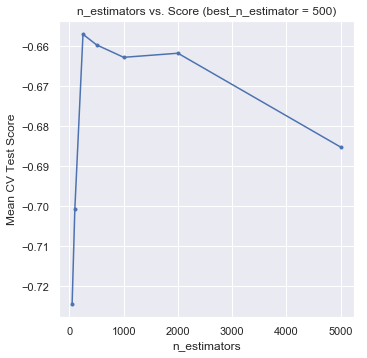

In [59]:
# fig=plt.figure(figsize=(18, 12))

# axes=fig.add_subplot(2, 3, 1)
# axes.plot(gb_score.index, gb_score.values, marker='.')
# axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 500)')


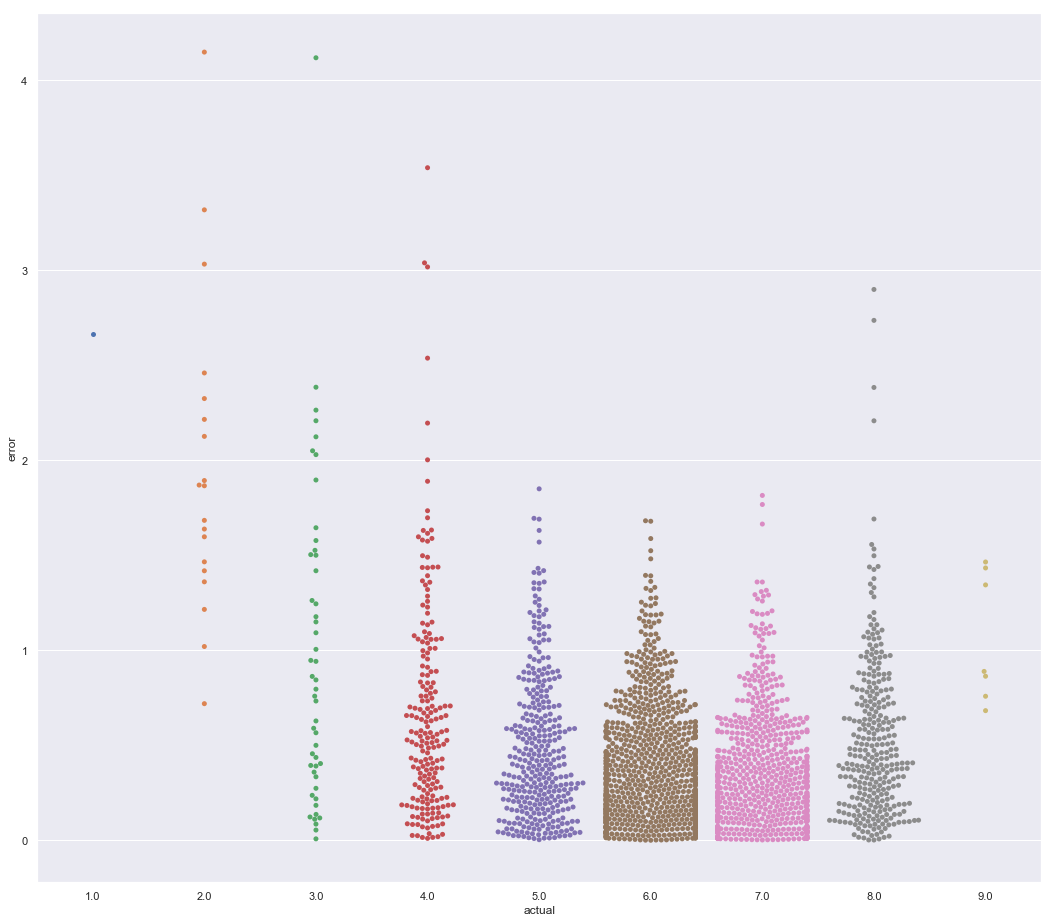

In [57]:
plot_true_vs_pred(y_test,y_predict_summary[1])


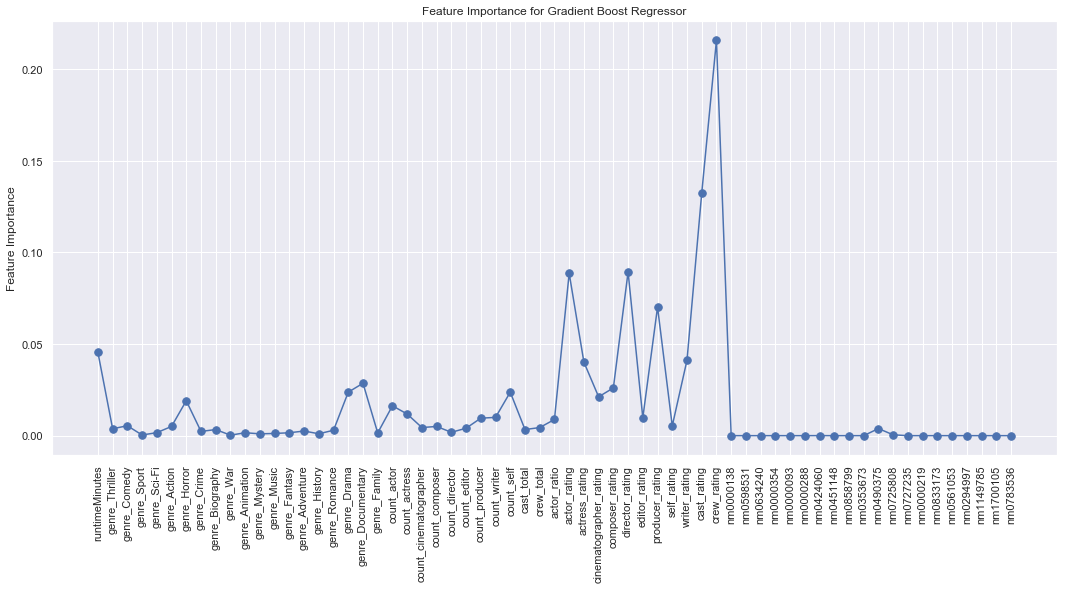

In [58]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(grad_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(grad_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Gradient Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()


## Ensemble Method - Adaboost

In [71]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

# param_distributions = {'n_estimators':[50,100,250,300,500,1000,2000], 'learning_rate':[0.001, 0.002, 0.005, 0.01,.02,.05,0.1]}
# ada_boost = RandomizedSearchCV(AdaBoostRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
# ada_boost.fit(X_train, y_train)


In [68]:
# print('Best parameters for Ada Boost Model: {}'.format(ada_boost.best_params_))

Best parameters for Ada Boost Model: {'n_estimators': 300, 'learning_rate': 0.05}


Best parameters for Ada Boost Model: {'n_estimators': 300, 'learning_rate': 0.05}


In [60]:
# Following code uses the best parameters generated above to fit the model

from sklearn.ensemble import AdaBoostRegressor

param_distributions = {'n_estimators':[300], 'learning_rate':[.05]}
ada_boost = RandomizedSearchCV(AdaBoostRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
%time ada_boost.fit(X_train, y_train)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Wall time: 52.8 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [300], 'learning_rate': [0.05]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=0)

In [61]:
param_summary = [ada_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ada_boost, X_train, y_train, X_test, y_test)
ypred_test['AB'] = y_predict_summary[1]
ypred_train['AB'] = y_predict_summary[0]

Wall time: 1.14 s


In [62]:
algo_score.loc['Ada Boost'] = rmse_summary+param_summary
algo_score.loc['Ada Boost', 'Training+Test Time(sec)'] = 53.94
cv_time.append(53.94)
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8
Gradient Boost,0.324200,0.624689,"{'n_estimators': 500, 'min_samples_split': 2, ...",89.796
Ada Boost,0.691293,0.694207,"{'n_estimators': 300, 'learning_rate': 0.05}",53.94


### Visualize the mean score against different values for n estimators

Parts of code have been commenting out as they take long time to execute

In [73]:
# ab_result=pd.DataFrame(ada_boost.cv_results_)
# ab_result

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.501665,0.882209,0.081738,0.040919,50,0.001,"{'n_estimators': 50, 'learning_rate': 0.001}",-0.755565,-0.740950,-0.750239,...,-0.777547,0.039888,47,-0.765072,-0.766204,-0.766286,-0.763735,-0.762197,-0.764699,0.001557
1,10.111534,3.846959,0.132164,0.078264,100,0.001,"{'n_estimators': 100, 'learning_rate': 0.001}",-0.759050,-0.740601,-0.756520,...,-0.778045,0.038511,48,-0.770703,-0.766685,-0.772447,-0.762441,-0.762828,-0.767021,0.004041
2,18.363725,1.777522,0.315623,0.052805,250,0.001,"{'n_estimators': 250, 'learning_rate': 0.001}",-0.753401,-0.739783,-0.754676,...,-0.775963,0.038345,45,-0.766425,-0.767257,-0.770960,-0.762740,-0.760628,-0.765602,0.003607
3,24.399078,2.382057,0.322018,0.059836,300,0.001,"{'n_estimators': 300, 'learning_rate': 0.001}",-0.753264,-0.740033,-0.754272,...,-0.775834,0.038136,44,-0.766365,-0.767229,-0.770328,-0.762493,-0.760182,-0.765319,0.003583
4,36.483384,3.547560,0.523552,0.076283,500,0.001,"{'n_estimators': 500, 'learning_rate': 0.001}",-0.752000,-0.738258,-0.752269,...,-0.772834,0.035474,41,-0.765169,-0.765579,-0.768789,-0.762116,-0.759389,-0.764209,0.003206
5,65.724714,2.697934,1.047740,0.386422,1000,0.001,"{'n_estimators': 1000, 'learning_rate': 0.001}",-0.741907,-0.728689,-0.746430,...,-0.765992,0.037024,34,-0.761656,-0.754941,-0.763479,-0.759395,-0.755322,-0.758958,0.003384
6,134.938375,26.136774,2.220146,0.487479,2000,0.001,"{'n_estimators': 2000, 'learning_rate': 0.001}",-0.721058,-0.714164,-0.724875,...,-0.743594,0.031703,30,-0.732319,-0.741183,-0.736902,-0.736451,-0.724340,-0.734239,0.005690
7,2.165862,0.280384,0.037171,0.011603,50,0.002,"{'n_estimators': 50, 'learning_rate': 0.002}",-0.756816,-0.743442,-0.750556,...,-0.780486,0.040098,49,-0.773518,-0.768925,-0.769794,-0.773256,-0.761754,-0.769449,0.004258
8,4.775221,0.869492,0.073888,0.025990,100,0.002,"{'n_estimators': 100, 'learning_rate': 0.002}",-0.746036,-0.743708,-0.753199,...,-0.776953,0.040186,46,-0.768116,-0.768550,-0.770263,-0.766566,-0.762362,-0.767171,0.002678
9,11.739249,1.834997,0.197890,0.088981,250,0.002,"{'n_estimators': 250, 'learning_rate': 0.002}",-0.743925,-0.737219,-0.752966,...,-0.772713,0.039394,40,-0.764368,-0.763091,-0.770391,-0.762662,-0.759345,-0.763971,0.003613


In [91]:
# ab_score = ab_result[ab_result.param_learning_rate==.05].groupby('param_n_estimators')['mean_test_score'].mean()
# ab_score

param_n_estimators
50     -0.732672
100    -0.715280
250    -0.705031
300    -0.703964
500    -0.705540
1000   -0.709836
2000   -0.709836
Name: mean_test_score, dtype: float64

[Text(0,0.5,'Mean CV Test Score'),
 Text(0.5,0,'n_estimators'),
 Text(0.5,1,'n_estimators vs. Score (best_n_estimator = 300)')]

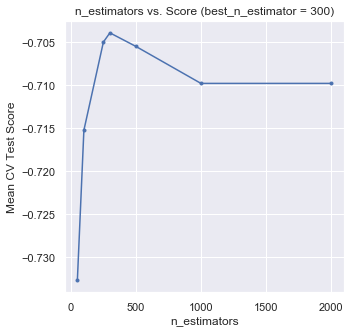

In [78]:
# fig=plt.figure(figsize=(5, 5))

# axes=fig.add_subplot(1, 1, 1)
# axes.plot(ab_score.index, ab_score.values, marker='.')
# axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 300)')

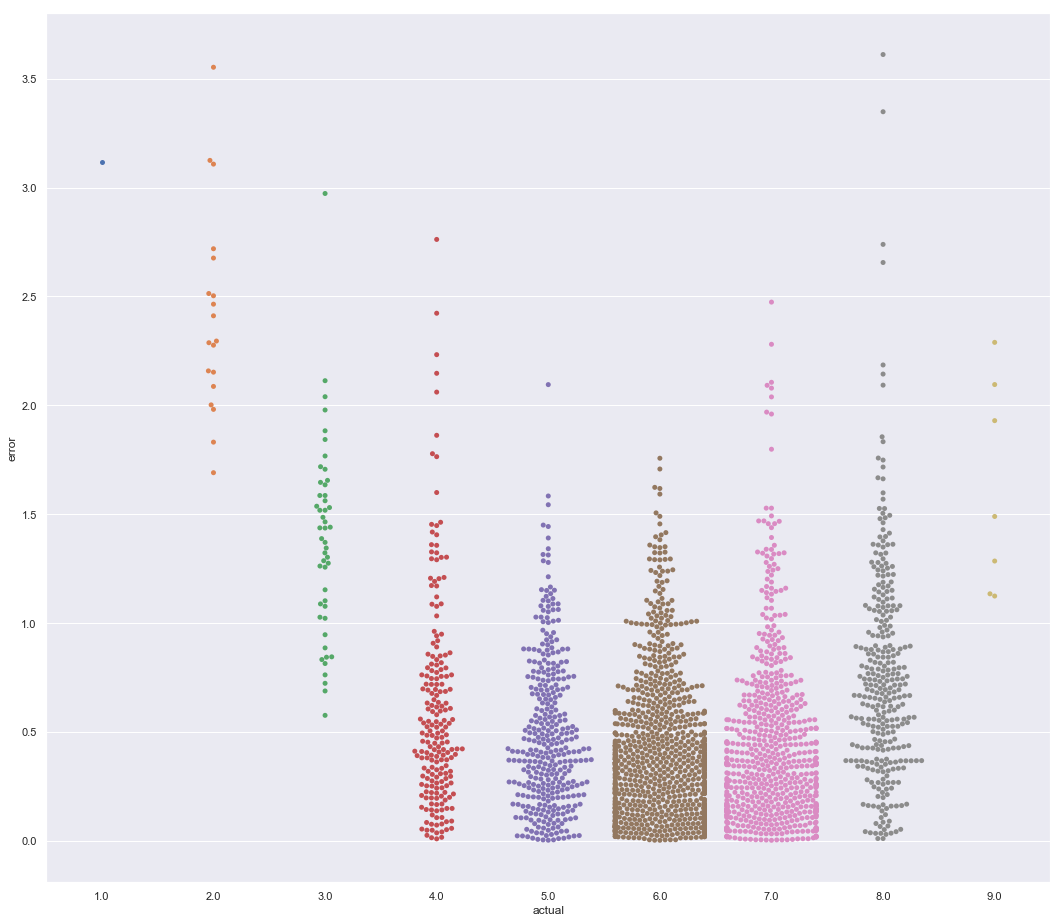

In [63]:
plot_true_vs_pred(y_test,y_predict_summary[1])

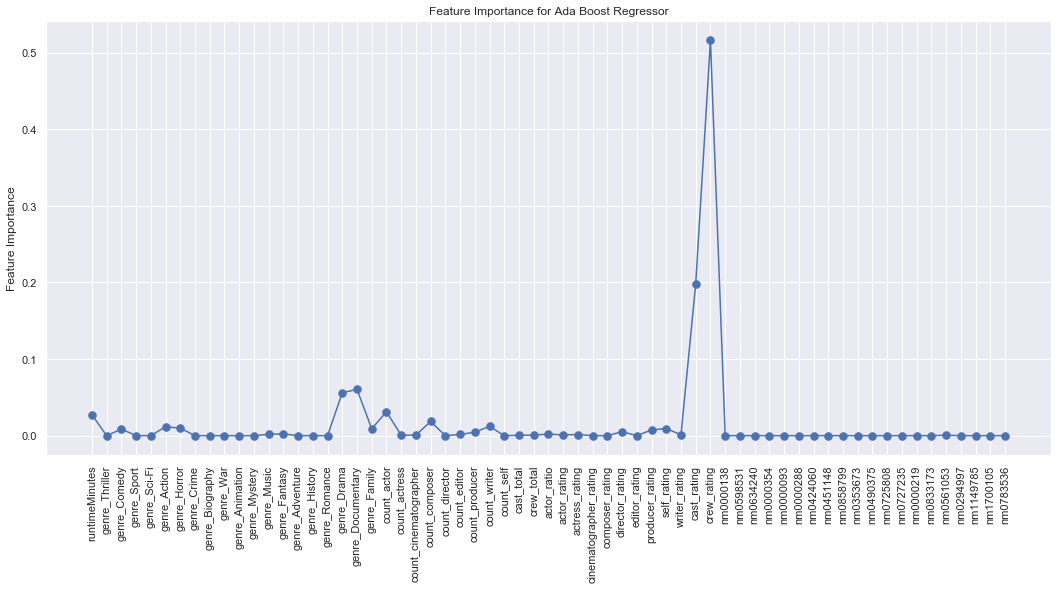

In [64]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(ada_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(ada_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Ada Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

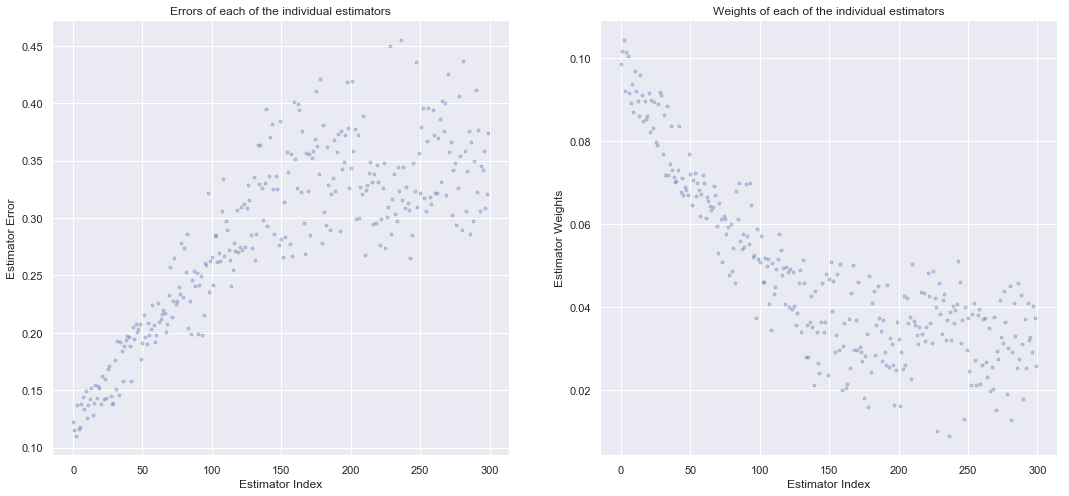

In [65]:
fig = plt.figure(figsize=(18, 8))

# Estimator Error Plot
axes = fig.add_subplot(1, 2, 1)
axes.plot(ada_boost.best_estimator_.estimator_errors_, linestyle='None', marker='.', alpha=0.3)
axes.set(xlabel='Estimator Index', ylabel='Estimator Error', title='Errors of each of the individual estimators')

# Estimator Weight Plot
axes = fig.add_subplot(1, 2, 2)
axes.plot(ada_boost.best_estimator_.estimator_weights_, linestyle='None', marker='.', alpha=0.3)
axes.set(xlabel='Estimator Index', ylabel='Estimator Weights', title='Weights of each of the individual estimators')

plt.show()

#### Observations

From the above plot, it AdaBoost might not be a good model for this problem. Every subsequent estimator seems to result in an increase in the error (and as a result, we give it a lower weight for our final combined estimator model)

## Stacking using Linear Regression

For stacking, we will use the predictions from various models above to be used as features.

In [66]:
# Split the dataset into training and test datasets

Xtrain_stack, Xtest_stack = ypred_train.drop('actualRating', axis=1), ypred_test.drop('actualRating', axis=1)
ytrain_stack, ytest_stack = ypred_train['actualRating'], ypred_test['actualRating']

In [67]:
# Stacking using Linear Regressor 

reg_stack = LinearRegression()

param_summary = ['','']

%time reg_stack.fit(Xtrain_stack, ytrain_stack)
%time rmse_summary, y_predict_summary = model_fit(reg_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

algo_score.loc['Stacking LR'] = rmse_summary+param_summary

Wall time: 54.4 ms
Wall time: 7.49 ms


In [68]:
algo_score.loc['Stacking LR', 'Training+Test Time(sec)'] = sum(cv_time)+0.062
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8
Gradient Boost,0.324200,0.624689,"{'n_estimators': 500, 'min_samples_split': 2, ...",89.796
Ada Boost,0.691293,0.694207,"{'n_estimators': 300, 'learning_rate': 0.05}",53.94
Stacking LR,0.192679,0.650138,,872.194


In [69]:
df_stack_coeff = pd.DataFrame({'Individual_Models': Xtrain_stack.columns, 'LR_Coeff': reg_stack.coef_})

In [71]:
df_stack_coeff

,Individual_Models,LR_Coeff
0,LR,-0.032217
1,Ridge,-0.176973
2,Lasso,0.108961
3,RF,2.010899
4,GB,-0.474797
5,AB,-0.450373


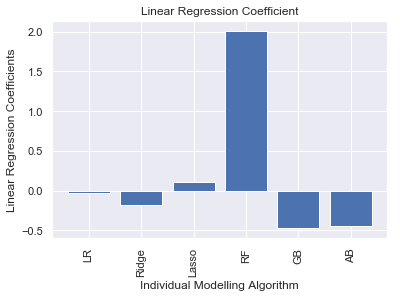

In [72]:
idx = np.array(range(len(reg_stack.coef_)))
labels = Xtrain_stack.columns
plt.bar(height=reg_stack.coef_, x=idx)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Individual Modelling Algorithm')
plt.ylabel('Linear Regression Coefficients')
plt.title('Linear Regression Coefficient')
plt.show()

### Stacking using Random Forest

In [133]:
# The code for hyperparameter tuning is commented out as it takes a long time to run 

# Tuning the hyperparameters

# param_distributions = {'n_estimators': [2000,5000], 'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10],'bootstrap': [True,False]}
# rf_stack = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
# %time rf_stack.fit(Xtrain_stack, ytrain_stack)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False, total= 1.0min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False, total=  49.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False, total=  53.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False, total= 1.1min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=100, bootstrap=True 
[CV] 

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total= 1.6min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total= 1.9min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total= 2.0min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total= 2.8min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 1.0min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False, total=  58.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False, total= 1.0min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False, total= 1.1min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=True, total=  20.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=True, total=  34.3s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True, total= 1.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True, total= 1.8min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, 

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=80, bootstrap=True, total= 2.9min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=80, bootstrap=True, total= 3.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=80, bootstrap=True, total= 4.6min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=True, total= 3.6min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=50, bootstrap=True, total= 1.4min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=2

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=60, bootstrap=True, total= 1.6min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True, total=  14.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True, total=  13.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True, total=  14.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estima

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=False, total=  23.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=False, total=  23.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=20, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  47.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  47.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=True, total=  47.5s
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True, total= 1.7min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total=  33.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total=  34.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total=  33.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=80, bootstrap=True, total=  33.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=20

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True, total=  54.4s
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True, total= 1.2min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True, total=  50.0s
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True, total=  45.6s
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, bootstrap=True, total=  18.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=  13.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=  13.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True, total=  13.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=40, bootstrap=True 
[CV]  n_estimators=20

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False, total=  57.5s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False, total=197.6min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=100, bootstrap=True, total= 2.3min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=100, bootstrap=True, total= 1.5min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estima

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.1min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True, total=  46.7s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_esti

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 1517.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [2000, 5000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 7, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

In [135]:
# print('Best parameters for Random Forest Regression Model: {}'.format(rf_stacktack.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}


Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}

In [73]:
# Following code uses the best parameters generated above to fit the model

param_distributions = {'n_estimators': [5000], 'max_features':['auto'], 'min_samples_leaf':[3], 'max_depth':[90], 'min_samples_split':[5],'bootstrap': [True]}
rf_stack = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time rf_stack.fit(Xtrain_stack, ytrain_stack)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 2.7min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s



[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 2.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 2.3min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 2.5min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.0min finished


Wall time: 16min 37s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [5000], 'max_features': ['auto'], 'min_samples_leaf': [3], 'max_depth': [90], 'min_samples_split': [5], 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), verbose=2)

In [76]:
param_summary = [rf_stack.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

Wall time: 20.2 s


In [89]:
algo_score.loc['Stacking RF'] = rmse_summary+param_summary
algo_score.loc['Stacking RF', 'Training+Test Time(sec)'] = sum(cv_time)+1012.30
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8
Gradient Boost,0.324200,0.624689,"{'n_estimators': 500, 'min_samples_split': 2, ...",89.796
Ada Boost,0.691293,0.694207,"{'n_estimators': 300, 'learning_rate': 0.05}",53.94
Stacking LR,0.192679,0.650138,,872.194
Stacking RF,0.111337,0.643452,"{'n_estimators': 5000, 'min_samples_split': 5,...",1012.3


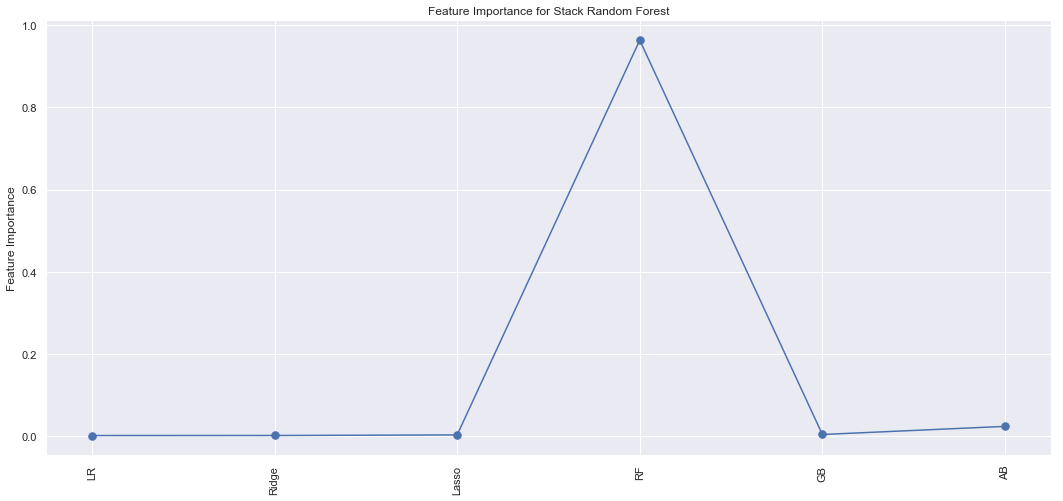

In [90]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_stack.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_stack.best_estimator_.feature_importances_)), Xtrain_stack.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Stack Random Forest')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

### Stacking using Gradient Boost


In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'learning_rate':[0.01, 0.02, 0.05, 0.1],'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10]}
gb_stack = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time gb_stack.fit(Xtrain_stack, ytrain_stack)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02, total= 1.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02, total= 1.2min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02, total= 1.2min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02, total= 1.0min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=20, learning_rate=0.02, total= 1.0min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=100, learning_rate=0.1, total=  44.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01, total=  28.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01, total=  23.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning_rate=0.01, total=  52.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=90, learning

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.02, total=   1.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.02, total=   1.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, learning_rate=0.02, total=   1.9s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.01, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.01 
[CV]

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05, total=  14.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05, total=  13.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05, total=  14.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, learning_rate=0.05, total=  13.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, 

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.1, total=  37.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.1 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=70, learning_rate=0.1, total=  37.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=90, learning_rate=0.05, total=  18.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=90, learning_rate=0.05, total=  19.7s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=90, learning_rate=0.

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05, total=  16.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05, total=  15.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05, total=  16.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=40, learning_rate=0.05, total=  15.0s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, learning_rate=0.0

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=60, learning_rate=0.1, total=  49.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01, total= 1.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01, total= 1.4min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.01, total= 1.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.0

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, learning_rate=0.02, total=  44.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, learning_rate=0.02, total=  42.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=70, learning_rate=0.02, total=  44.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=20, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=20, learning_rate=0.01, total=  23.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=20, learning_ra

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05, total=  38.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05, total=  39.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05, total=  38.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, learning_rate=0.05, total=  38.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=60, 

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1, total=   1.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1, total=   1.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.01, total=  35.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=0.01, total=  36.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=80, learning_rate=

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05, total=   2.5s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05, total=   2.5s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05, total=   2.6s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.05, total=   2.5s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_features=auto, max_depth=90, learning_

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02, total=   1.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01, total=  19.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01, total=  28.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.01, total=  31.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=80, learning_rate=0.

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.1, total=   9.9s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.1, total=   9.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.1, total=   9.7s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.1 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.1, total=  33.9s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.1 
[

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05, total=   2.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05, total=   1.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05, total=   1.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.05, total=   1.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=100, learning_rate=0.

[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=80, learning_rate=0.02, total=   2.7s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=80, learning_rate=0.02 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=80, learning_rate=0.02, total=   2.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.05, total=  22.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.05, total=  21.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02, total=   4.9s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02, total=   6.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02, total=   6.6s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=90, learning_rate=0.02, total=   5.4s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 306.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [50, 100, 250, 500, 1000, 2000, 5000], 'learning_rate': [0.01, 0.02, 0.05, 0.1], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 3, 7, 10], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(rmse, greater_is_better=False), ver

In [92]:
print('Best parameters for Random Forest Regression Model: {}'.format(gb_stack.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.02}


Best parameters for Random Forest Regression Model: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.02}

In [93]:
param_summary = [gb_stack.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(gb_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

Wall time: 327 ms


In [94]:
algo_score.loc['Stacking GB'] = rmse_summary+param_summary
algo_score.loc['Stacking GB', 'Training+Test Time(sec)'] = sum(cv_time)+1210.30
algo_score

,Train RMSE,Test RMSE,Hyperparameters,Training+Test Time(sec)
Modelling Algo,,,,
Linear Regression,0.889720,0.903349,,0.214
Ridge Regression,0.890131,0.902272,{'alpha': 2.75},5.414
Lasso Regression,0.913179,0.919122,{'alpha': 0.01},59.968
Random Forest,0.300850,0.630694,"{'n_estimators': 5000, 'min_samples_split': 10...",662.8
Gradient Boost,0.324200,0.624689,"{'n_estimators': 500, 'min_samples_split': 2, ...",89.796
Ada Boost,0.691293,0.694207,"{'n_estimators': 300, 'learning_rate': 0.05}",53.94
Stacking LR,0.192679,0.650138,,872.194
Stacking RF,0.111337,0.643452,"{'n_estimators': 5000, 'min_samples_split': 5,...",1012.3
Stacking GB,0.089379,0.647480,"{'n_estimators': 250, 'min_samples_split': 10,...",2082.43


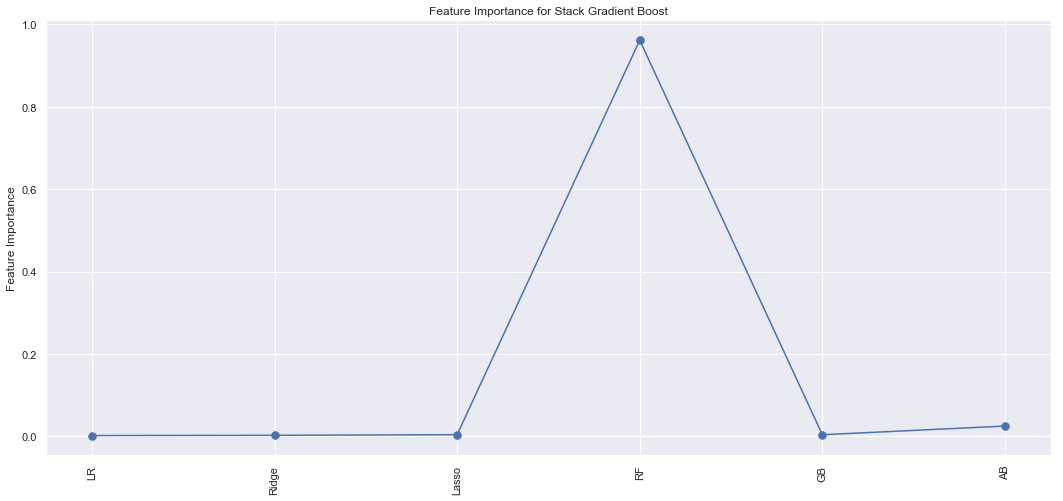

In [95]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(gb_stack.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(gb_stack.best_estimator_.feature_importances_)), Xtrain_stack.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Stack Gradient Boost')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

## SUMMARY AND CONCLUSIONS

### RMSE

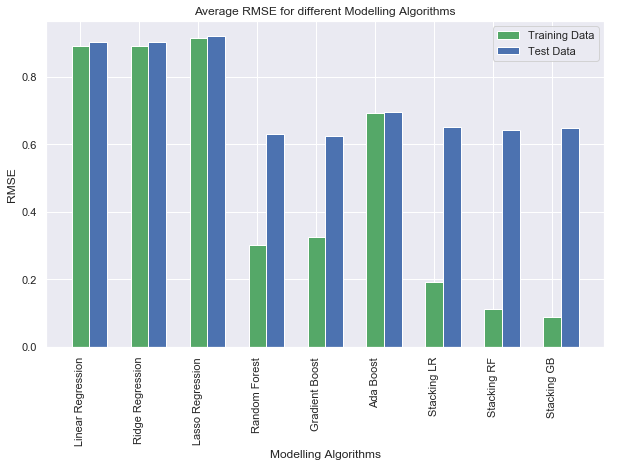

In [105]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Train RMSE', x=idx, color='g', width=bar_width, label='Training Data')
plt.bar(data=algo_score, height='Test RMSE', x=idx+bar_width, color='b', width=bar_width, label='Test Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()

From the above plot, we can see that Random Forest and Gradient Boost give us very similar and the best predictions with least RMSE. Comparing the train and test data predictions, the model seems to be be overfitted. But we are not much worried about it, as despite overfitting, we are getting good results on the test data.

In order to decide between Random Forest and Gradient Boost, let us look at the time taken in fitting the model. In all the algorithms, the prediction time was very small in comparison to the fit time.

### Train/Test Time

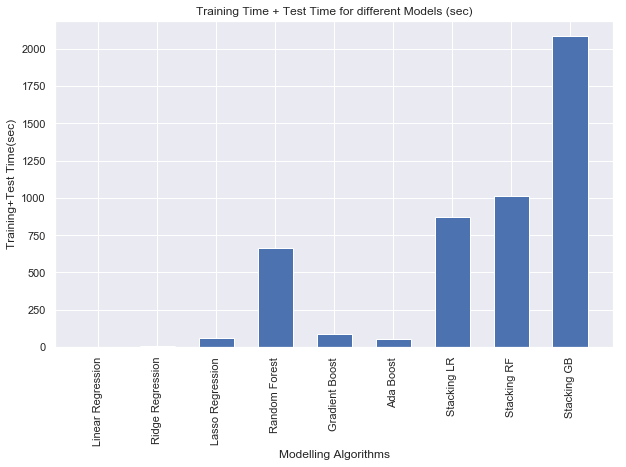

In [99]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.6
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Training+Test Time(sec)', x=idx, width=bar_width)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('Training+Test Time(sec)')
plt.title('Training Time + Test Time for different Models (sec)')
#axes.set_yscale('log')
plt.show()

As seen above, Gradient Boost is taking much lesser time as compared to Random Forest. So we choose Gradient Boost as our final algorithm. 
Gradient Boost gives an RMSE of 0.625 on our test data.

References:

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74